# Random Forest Algorithm implementation
#### Suggestions: you have to use 'colab' for this project because dataset is huge
### Data description
There are 3 types of input features:

- Objective: factual information;
- Examination: results of medical examination;
- Subjective: information given by the patient.

Features:

- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm) |
- Weight | Objective Feature | weight | float (kg) |
- Gender | Objective Feature | gender | categorical code |
- Systolic blood pressure | Examination Feature | ap_hi | int |
- Diastolic blood pressure | Examination Feature | ap_lo | int |
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
- Smoking | Subjective Feature | smoke | binary |
_ Alcohol intake | Subjective Feature | alco | binary |
_ Physical activity | Subjective Feature | active | binary |
_ Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.

>Step-1: Import necessary library

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

> Step-2: Read data from a dataset using pandas

In [51]:
dataset = pd.read_csv('cardio_train.csv')

#print dataset
dataset


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [52]:
# print shape of the dataset
dataset.shape


(70000, 13)

> Step-3: Check the dataset has any null value or not,if any null value found we have to handle those null value


In [53]:
dataset.isnull().values.any()

False

In [54]:
# or
dataset.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

##### We don't found any null value


> Step-4: visualisation (optional)

<AxesSubplot:xlabel='gender', ylabel='count'>

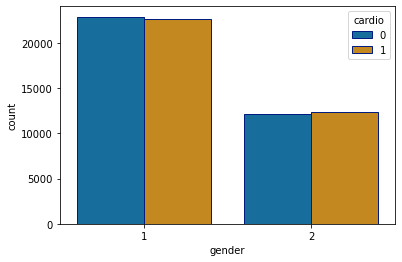

In [55]:
seaborn.countplot(x='gender', hue='cardio', data=dataset, palette="colorblind", edgecolor = seaborn.color_palette("dark", n_colors=1))

<AxesSubplot:xlabel='year', ylabel='count'>

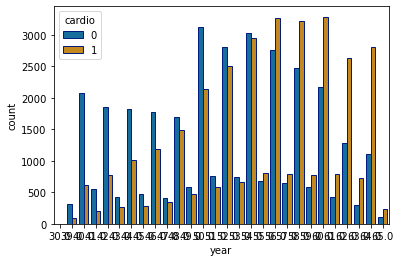

In [56]:
# Our dataset gives us age as days
# we have to convert days to years

dataset['year'] = (dataset.age/365).round(0)
seaborn.countplot(x='year', hue='cardio', data=dataset, palette="colorblind", edgecolor = seaborn.color_palette("dark", n_colors=1))

In [57]:
x = dataset.iloc[:,1:-2]
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [58]:
y = dataset.cardio
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

> Step-5: Now Split the dataset into train and test dataset,
    for this we have to import "train_test_split" from sklearn

In [59]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain,ytest = train_test_split(x,y, test_size=.3, random_state=1)

In [60]:
# 70% data for train
xtrain.shape

(49000, 11)

In [61]:
# 30% data for test
xtest.shape

(21000, 11)

> Step-5: Now time to create modal
>  - import RandomForestClassifier from sklearn.ensemble
>  - create RandomForestClassifier object
>  - And fit(train) the modal

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc_Modal = RandomForestClassifier()
rfc_Modal.fit(xtrain, ytrain)

RandomForestClassifier()

> get the accuracy using test dataset score()

In [63]:
rfc_Modal.score(xtest,ytest)

0.7168571428571429

> accuracy is 71.6%

> By default, n_estimators = 100, that means total 100 tree will be generated

> Now try with custom n_estimators

In [67]:
rfc_Modal = RandomForestClassifier(n_estimators=10)
rfc_Modal.fit(xtrain, ytrain)

rfc_Modal.score(xtest,ytest)

0.7021904761904761

> with n_estimators = 10,accuracy is 70.2%

> Now compare with decision tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain, ytrain)

dt_model.score(xtest, ytest)

0.6365714285714286

> With Decision Tree accuracy is 63.6%

> Which is better? it must be Random forest.

#### it's time to prediction with an input, Output 0 means No, 1 means Yes


> inputformat -> [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc,smoke, alco, active]

### Prediction 1

In [74]:
data = [[21345, 1, 165, 62.0, 110, 80, 1, 0, 1, 1, 1,]]

prediction = rfc_Modal.predict(data)[0]

if prediction == 0:
    print("Absence of cardiovascular disease")
elif prediction == 1:
    print("Presence of cardiovascular disease")

0

### Prediction 2

In [ ]:
data = [[20228, 1, 156, 85.0, 140, 90, 3, 1, 0, 0, 1,]]

prediction = rfc_Modal.predict(data)[0]

if prediction == 0:
    print("Absence of cardiovascular disease")
elif prediction == 1:
    print("Presence of cardiovascular disease")